Original code: https://www.kaggle.com/andradaolteanu/work-w-audio-data-visualise-classify-recommend

Dataset (GTZAN): https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

# 데이터셋 다운로드

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'username' # username
os.environ['KAGGLE_KEY'] = 'key' # key

In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

 99% 1.20G/1.21G [00:11<00:00, 126MB/s]
100% 1.21G/1.21G [00:11<00:00, 116MB/s]


In [ ]:
!unzip -q gtzan-dataset-music-genre-classification.zip

# 오디오 파일 이해하기

- y: 소리가 떨리는 세기(진폭)를 시간 순서대로 나열한 것
- Sampling rate: 1초당 샘플의 개수, 단위 Hz 또는 kHz

In [ ]:
import librosa

y1, sr1 = librosa.load('C:/nmb/nmb_data/we/testvoice_민선.wav')
y2, sr2 = librosa.load('C:/nmb/nmb_data/we/testvoice_민선높은음.wav')
y3, sr3 = librosa.load('C:/nmb/nmb_data/we/testvoice_현민.wav')
y4, sr4 = librosa.load('C:/nmb/nmb_data/we/testvoice_영리.wav')
y5, sr5 = librosa.load('C:/nmb/nmb_data/we/testvoice_종호.wav')
y6, sr6 = librosa.load('C:/nmb/nmb_data/we/testvoice_주형.wav')
y7, sr7 = librosa.load('C:/nmb/nmb_data/we/testvoice_주형낮은음.wav')

print('민선')
print(y1)
print(len(y1))
print('Sampling rate (KHz): %d' % sr1)
print('Audio length (seconds): %.2f' % (len(y1) / sr1))
print('----------------------------------------------------------')
print('민선높은음')
print(y2)
print(len(y2))
print('Sampling rate (KHz): %d' % sr2)
print('Audio length (seconds): %.2f' % (len(y2) / sr2))
print('----------------------------------------------------------')
print('현민')
print(y3)
print(len(y3))
print('Sampling rate (KHz): %d' % sr3)
print('Audio length (seconds): %.2f' % (len(y3) / sr3))
print('----------------------------------------------------------')
print('영리')
print(y4)
print(len(y4))
print('Sampling rate (KHz): %d' % sr4)
print('Audio length (seconds): %.2f' % (len(y4) / sr4))
print('----------------------------------------------------------')
print('종호'')
print(y5)
print(len(y5))
print('Sampling rate (KHz): %d' % sr5)
print('Audio length (seconds): %.2f' % (len(y5) / sr5))
print('----------------------------------------------------------')
print('주형')
print(y6)
print(len(y6))
print('Sampling rate (KHz): %d' % sr6)
print('Audio length (seconds): %.2f' % (len(y6) / sr6))
print('----------------------------------------------------------')
print('주형낮은음')
print(y7)
print(len(y7))
print('Sampling rate (KHz): %d' % sr7)
print('Audio length (seconds): %.2f' % (len(y7) / sr7))
print('----------------------------------------------------------')

[0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388]
661794
Sampling rate (KHz): 22050
Audio length (seconds): 30.01


## 음악 들어보기

In [ ]:
import IPython.display as ipd

ipd.Audio(y, rate=sr)

## 2D 음파 그래프

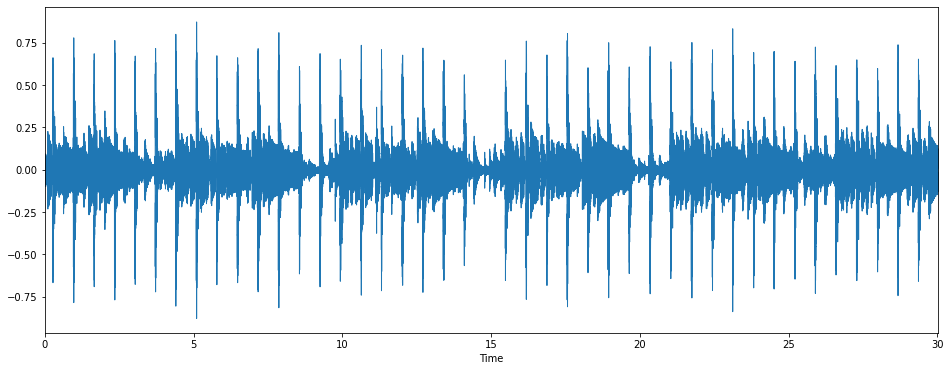

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(16, 6))
librosa.display.waveplot(y=y, sr=sr)
plt.show()

## Fourier Transform

- 시간 영역 데이터를 주파수 영역으로 변경
- y축: 주파수 (로그 스케일)
- color축: 데시벨 (진폭)

(1025, 1293)


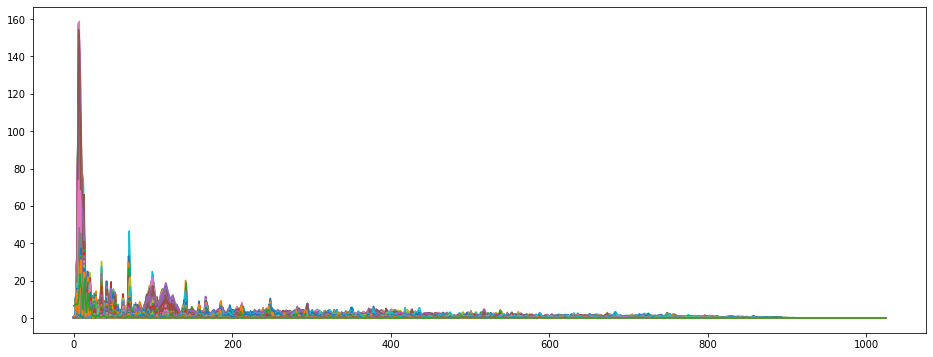

In [ ]:
import numpy as np

D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))

print(D.shape)

plt.figure(figsize=(16, 6))
plt.plot(D)
plt.show()

## Spectogram

- 시간에 따른 신호 주파수의 스펙트럼 그래프
- 다른 이름: Sonographs, Voiceprints, Voicegrams

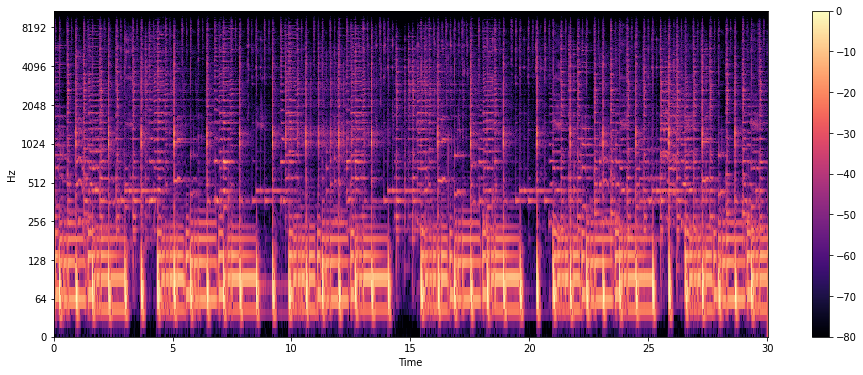

In [ ]:
DB = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(16, 6))
librosa.display.specshow(DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

## Mel Spectogram

- (인간이 이해하기 힘든) Spectogram의 y축을 Mel Scale로 변환한 것 (Non-linear transformation)
- Mel Scale: https://newsight.tistory.com/294

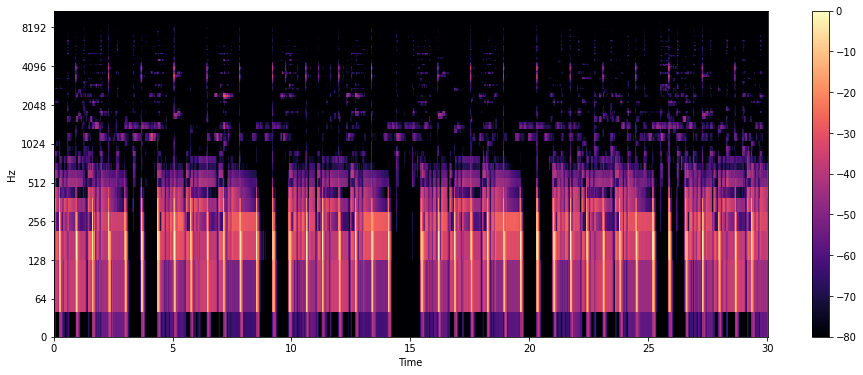

In [ ]:
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

## 레게 vs 클래식 Mel Spectogram

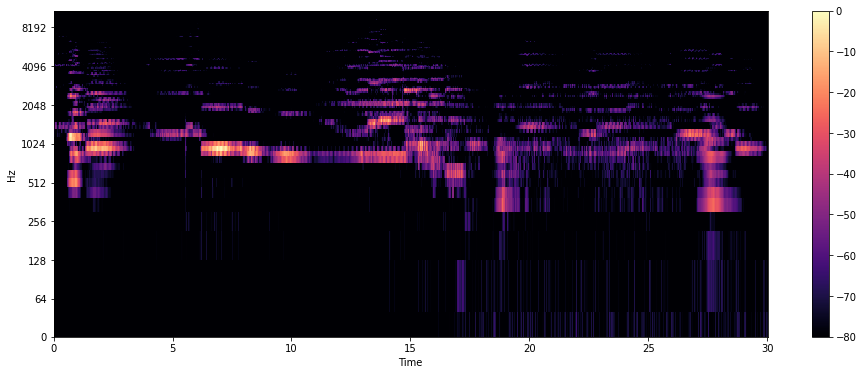

In [ ]:
y, sr = librosa.load('Data/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis = 'time', y_axis = 'log')
plt.colorbar()
plt.show()

# 오디오 특성 추출 (Audio Feature Extraction)

## Tempo (BPM)

In [ ]:
tempo, _ = librosa.beat.beat_track(y, sr=sr)
print(tempo)

107.666015625


## Zero Crossing Rate

- 음파가 양에서 음으로 또는 음에서 양으로 바뀌는 비율

In [ ]:
zero_crossings = librosa.zero_crossings(y, pad=False)

print(zero_crossings)
print(sum(zero_crossings))

[False False False ... False False False]
39405


### 확대해서 보자

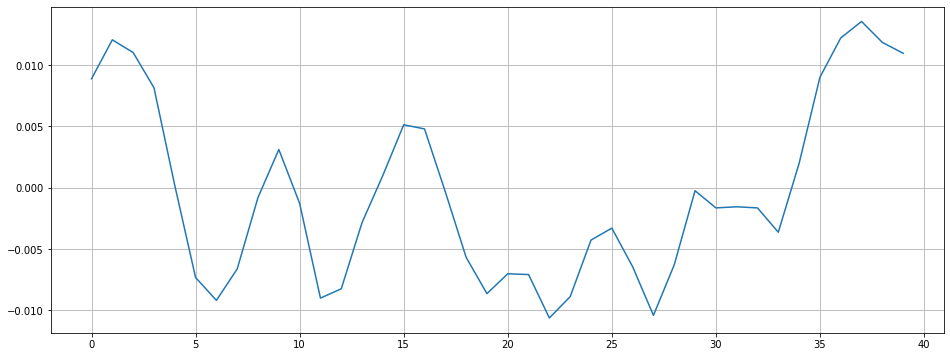

In [ ]:
n0 = 9000
n1 = 9040

plt.figure(figsize=(16, 6))
plt.plot(y[n0:n1])
plt.grid()
plt.show()

In [ ]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

6


## Harmonic and Percussive Components

- Harmonics: 사람의 귀로 구분할 수 없는 특징들 (음악의 색깔)
- Percussives: 리듬과 감정을 나타내는 충격파

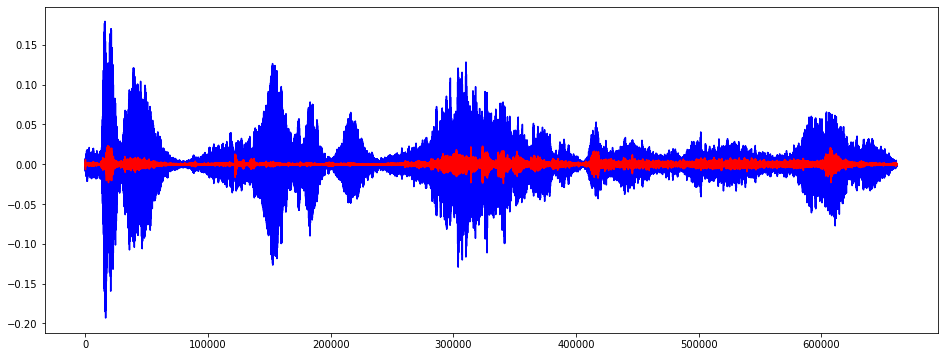

In [ ]:
y_harm, y_perc = librosa.effects.hpss(y)

plt.figure(figsize=(16, 6))
plt.plot(y_harm, color='b')
plt.plot(y_perc, color='r')
plt.show()

## Spectral Centroid

- 소리를 주파수 표현했을 때, 주파수의 가중평균을 계산하여 소리의 "무게 중심"이 어딘지를 알려주는 지표
- 예를 들어, 블루스 음악은 무게 중심이 가운데 부분에 놓여있는 반면, 메탈 음악은 (끝 부분에서 달리기 때문에) 노래의 마지막 부분에 무게 중심이 실린다

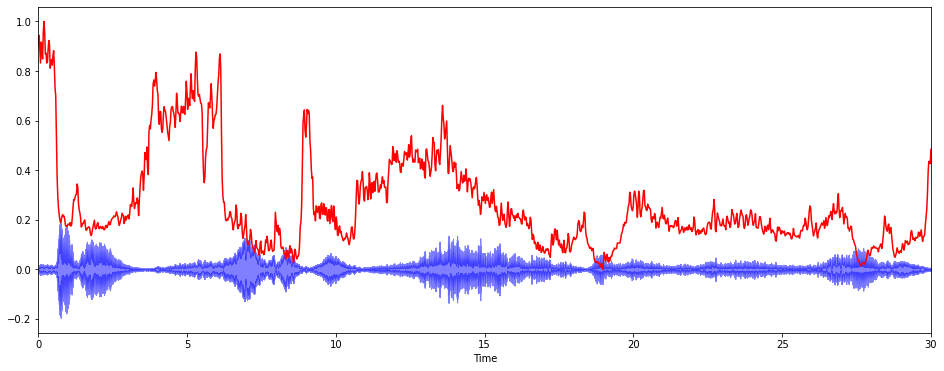

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(16, 6))
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

# Spectral Rolloff

- 신호 모양을 측정한다
- 총 스펙트럴 에너지 중 낮은 주파수(85% 이하)에 얼마나 많이 집중되어 있는가

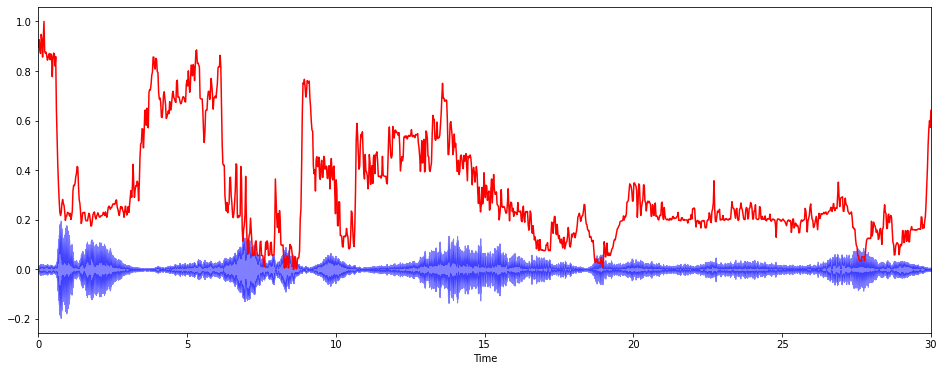

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]

plt.figure(figsize=(16, 6))
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.show()

## Mel-Frequency Cepstral Coefficients (MFCCs)

- MFCCs는 특징들의 작은 집합(약 10-20)으로 스펙트럴 포곡선의 전체적인 모양을 축약하여 보여준다
- 사람의 청각 구조를 반영하여 음성 정보 추출
- https://tech.kakaoenterprise.com/66

mean: 0.48
var: 0.04


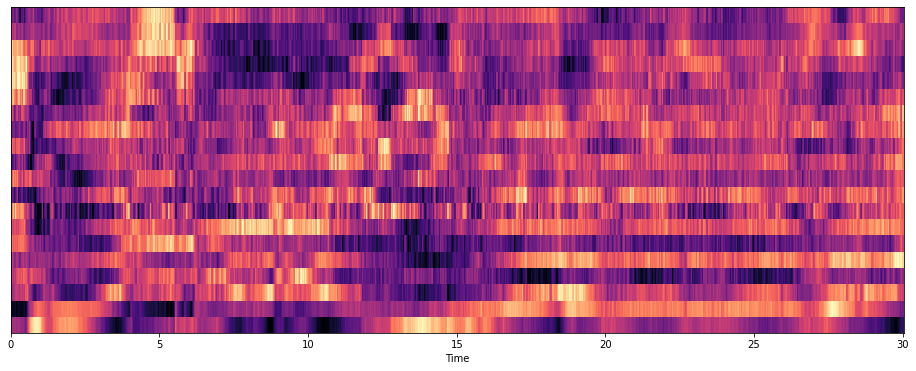

In [ ]:
mfccs = librosa.feature.mfcc(y, sr=sr)
mfccs = normalize(mfccs, axis=1)

print('mean: %.2f' % mfccs.mean())
print('var: %.2f' % mfccs.var())

plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

## Chroma Frequencies

- 크로마 특징은 음악의 흥미롭고 강렬한 표현이다
- 크로마는 인간 청각이 옥타브 차이가 나는 주파수를 가진 두 음을 유사음으로 인지한다는 음악이론에 기반한다
- 모든 스펙트럼을 12개의 Bin으로 표현한다
- 12개의 Bin은 옥타브에서 12개의 각기 다른 반음(Semitones=Chroma)을 의미한다

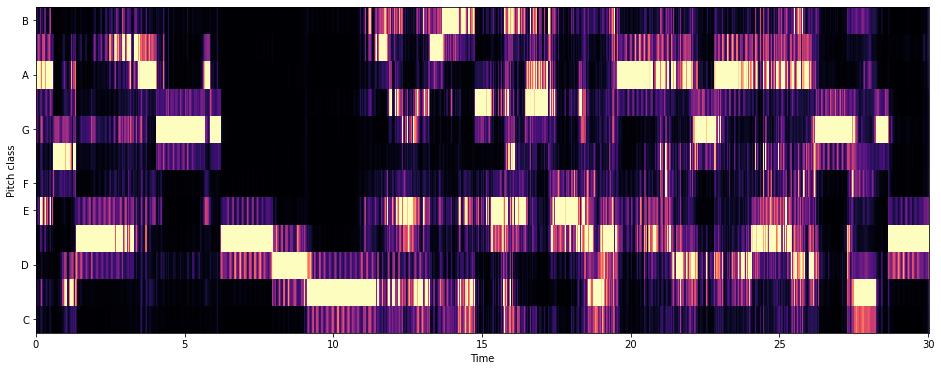

In [ ]:
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512)
plt.show()

# 느낀 점

뭔가 특징들을 될 수 있는대로 추출하여 모델에 때려넣으면 알아서 잘 분류하겠지?라는 기도 메타...

# 학습

## 데이터셋 로드

In [ ]:
import pandas as pd

df = pd.read_csv('Data/features_3_sec.csv')

df.head()

filename  length  chroma_stft_mean  ...  mfcc20_mean  mfcc20_var  label
0  blues.00000.0.wav   66149          0.335406  ...    -0.243027   43.771767  blues
1  blues.00000.1.wav   66149          0.343065  ...     5.784063   59.943081  blues
2  blues.00000.2.wav   66149          0.346815  ...     2.517375   33.105122  blues
3  blues.00000.3.wav   66149          0.363639  ...     3.630866   32.023678  blues
4  blues.00000.4.wav   66149          0.335579  ...     0.536961   29.146694  blues

[5 rows x 60 columns]

## 전처리

In [ ]:
X = df.drop(columns=['filename', 'length', 'label'])
y = df['label']

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

X.head()

chroma_stft_mean  chroma_stft_var  ...  mfcc20_mean  mfcc20_var
0          0.355399         0.716757  ...     0.506746    0.047781
1          0.367322         0.670347  ...     0.593029    0.065548
2          0.373159         0.728067  ...     0.546264    0.036062
3          0.399349         0.677066  ...     0.562204    0.034873
4          0.355668         0.689113  ...     0.517913    0.031713

[5 rows x 57 columns]

## 데이터셋 분할

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7992, 57) (7992,)
(1998, 57) (1998,)


## 학습 및 검증

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)

y_preds = xgb.predict(X_test)

print('Accuracy: %.2f' % accuracy_score(y_test, y_preds))

Accuracy: 0.88


## Confusion Matrix

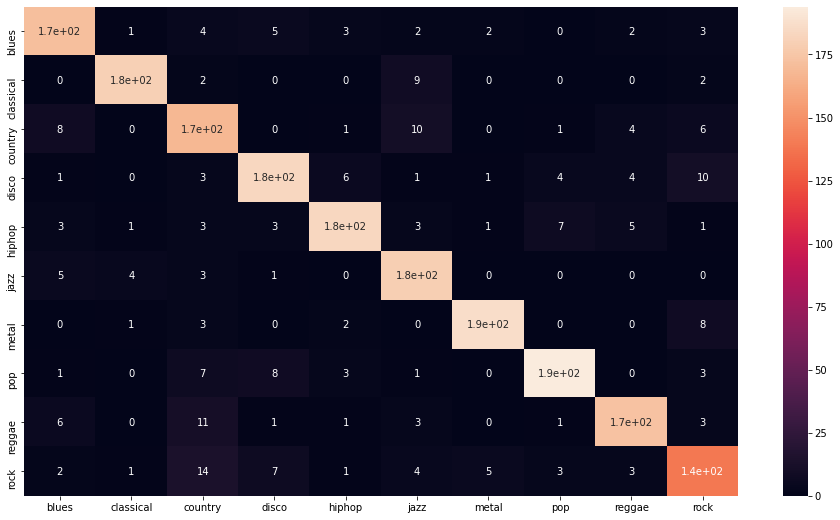

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(16, 9))
sns.heatmap(
    cm,
    annot=True, 
    xticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
    yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
)
plt.show()

In [ ]:
for feature, importance in zip(X_test.columns, xgb.feature_importances_):
  print('%s: %.2f' % (feature, importance))

chroma_stft_mean: 0.04
chroma_stft_var: 0.03
rms_mean: 0.02
rms_var: 0.03
spectral_centroid_mean: 0.02
spectral_centroid_var: 0.02
spectral_bandwidth_mean: 0.05
spectral_bandwidth_var: 0.01
rolloff_mean: 0.02
rolloff_var: 0.03
zero_crossing_rate_mean: 0.02
zero_crossing_rate_var: 0.01
harmony_mean: 0.02
harmony_var: 0.02
perceptr_mean: 0.02
perceptr_var: 0.08
tempo: 0.02
mfcc1_mean: 0.02
mfcc1_var: 0.03
mfcc2_mean: 0.01
mfcc2_var: 0.01
mfcc3_mean: 0.01
mfcc3_var: 0.02
mfcc4_mean: 0.04
mfcc4_var: 0.02
mfcc5_mean: 0.01
mfcc5_var: 0.03
mfcc6_mean: 0.02
mfcc6_var: 0.01
mfcc7_mean: 0.01
mfcc7_var: 0.03
mfcc8_mean: 0.01
mfcc8_var: 0.01
mfcc9_mean: 0.02
mfcc9_var: 0.01
mfcc10_mean: 0.01
mfcc10_var: 0.01
mfcc11_mean: 0.01
mfcc11_var: 0.01
mfcc12_mean: 0.03
mfcc12_var: 0.01
mfcc13_mean: 0.01
mfcc13_var: 0.01
mfcc14_mean: 0.01
mfcc14_var: 0.01
mfcc15_mean: 0.01
mfcc15_var: 0.01
mfcc16_mean: 0.01
mfcc16_var: 0.01
mfcc17_mean: 0.01
mfcc17_var: 0.00
mfcc18_mean: 0.01
mfcc18_var: 0.01
mfcc19_mean: 0

# 간단한 추천 시스템

In [ ]:
df_30 = pd.read_csv('Data/features_30_sec.csv', index_col='filename')

labels = df_30[['label']]
df_30 = df_30.drop(columns=['length', 'label'])

df_30_scaled = sklearn.preprocessing.scale(df_30)

df_30 = pd.DataFrame(df_30_scaled, columns=df_30.columns)

df_30.head()

chroma_stft_mean  chroma_stft_var  ...  mfcc20_mean  mfcc20_var
0         -0.350137         0.312587  ...     0.604064   -0.512988
1         -0.462482         1.117572  ...     0.424127   -0.538421
2         -0.184225        -0.137701  ...    -0.296189   -0.874954
3          0.319639         0.990659  ...    -0.602881   -0.844508
4         -0.859077         0.194163  ...    -2.766009   -0.330287

[5 rows x 57 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(df_30)

sim_df = pd.DataFrame(similarity, index=labels.index, columns=labels.index)

sim_df.head()

filename         blues.00000.wav  ...  rock.00099.wav
filename                          ...                
blues.00000.wav         1.000000  ...        0.304098
blues.00001.wav         0.049231  ...        0.311723
blues.00002.wav         0.589618  ...        0.321069
blues.00003.wav         0.284862  ...        0.183210
blues.00004.wav         0.025561  ...        0.061785

[5 rows x 1000 columns]

In [ ]:
def find_similar_songs(name, n=5):
  series = sim_df[name].sort_values(ascending=False)

  series = series.drop(name)

  return series.head(n).to_frame()

find_similar_songs('rock.00000.wav')

rock.00000.wav
filename                         
rock.00079.wav           0.681819
rock.00026.wav           0.677842
country.00070.wav        0.675324
rock.00064.wav           0.662020
rock.00096.wav           0.654814